# Иерархическая кластеризация

In [1]:
from sklearn import datasets
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

from scipy.cluster.hierarchy import dendrogram, linkage

import warnings
warnings.filterwarnings("ignore")

In [3]:
# импортируем набор данных
df = pd.read_csv('titanic.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
label_encoder = label_encoder.fit(df['Embarked'])
df['Embarked'] = label_encoder.transform(df['Embarked'])

In [7]:
df = df.dropna()

In [8]:
X = df.iloc[:, [5, 9, 1, 2]].values
X

array([[ 38.    ,  71.2833,   1.    ,   1.    ],
       [ 35.    ,  53.1   ,   1.    ,   1.    ],
       [ 54.    ,  51.8625,   0.    ,   1.    ],
       [  4.    ,  16.7   ,   1.    ,   3.    ],
       [ 58.    ,  26.55  ,   1.    ,   1.    ],
       [ 34.    ,  13.    ,   1.    ,   2.    ],
       [ 28.    ,  35.5   ,   1.    ,   1.    ],
       [ 19.    , 263.    ,   0.    ,   1.    ],
       [ 49.    ,  76.7292,   1.    ,   1.    ],
       [ 65.    ,  61.9792,   0.    ,   1.    ],
       [ 38.    ,  80.    ,   1.    ,   1.    ],
       [ 45.    ,  83.475 ,   0.    ,   1.    ],
       [ 29.    ,  10.5   ,   1.    ,   2.    ],
       [ 25.    ,   7.65  ,   0.    ,   3.    ],
       [ 23.    , 263.    ,   1.    ,   1.    ],
       [ 46.    ,  61.175 ,   0.    ,   1.    ],
       [ 71.    ,  34.6542,   0.    ,   1.    ],
       [ 23.    ,  63.3583,   1.    ,   1.    ],
       [ 21.    ,  77.2875,   0.    ,   1.    ],
       [ 47.    ,  52.    ,   0.    ,   1.    ],
       [ 24.    , 24

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185 entries, 1 to 889
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  185 non-null    int64  
 1   Survived     185 non-null    int64  
 2   Pclass       185 non-null    int64  
 3   Name         185 non-null    object 
 4   Sex          185 non-null    object 
 5   Age          185 non-null    float64
 6   SibSp        185 non-null    int64  
 7   Parch        185 non-null    int64  
 8   Ticket       185 non-null    object 
 9   Fare         185 non-null    float64
 10  Cabin        185 non-null    object 
 11  Embarked     185 non-null    int64  
dtypes: float64(2), int64(6), object(4)
memory usage: 18.8+ KB


In [10]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked
count,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000
mean,455.264865,0.675676,1.189189,35.829297,0.459459,0.470270,78.696712,1.297297
std,248.948244,0.469392,0.512763,15.679356,0.642456,0.752122,75.931898,0.968663
min,2.000000,0.000000,1.000000,0.920000,0.000000,0.000000,0.000000,0.000000
25%,263.000000,0.000000,1.000000,24.000000,0.000000,0.000000,29.700000,0.000000
50%,457.000000,1.000000,1.000000,36.000000,0.000000,0.000000,57.000000,2.000000
75%,680.000000,1.000000,1.000000,48.000000,1.000000,1.000000,90.000000,2.000000
max,890.000000,1.000000,3.000000,80.000000,3.000000,4.000000,512.329200,3.000000


In [12]:
df.Embarked.unique()

array([0, 2, 3, 1])

In [14]:
df.Embarked.value_counts()

2    116
0     65
3      2
1      2
Name: Embarked, dtype: int64

In [20]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [ ]:
# correl=df.corr()
# sns.heatmap(correl,annot=True)

In [ ]:
# x_axis = df.SepalLengthCm.values 
# y_axis = df.SepalWidthCm.values 

# plt.xlabel(df.columns.values[1])
# plt.ylabel(df.columns.values[2])
# plt.scatter(x_axis, y_axis)
# plt.show()

In [ ]:
# import seaborn as sns

# sns.set_style("whitegrid")
# sns.pairplot(df,hue="Species",size=3);
# plt.show()

In [ ]:
# sns.FacetGrid(df,hue="Species",size=3).map(sns.distplot,"SepalLengthCm").add_legend()
# sns.FacetGrid(df,hue="Species",size=3).map(sns.distplot,"SepalWidthCm").add_legend()
# sns.FacetGrid(df,hue="Species",size=3).map(sns.distplot,"PetalLengthCm").add_legend()
# sns.FacetGrid(df,hue="Species",size=3).map(sns.distplot,"PetalWidthCm").add_legend()

# plt.show()

In [ ]:
# sns.boxplot(x="Species",y="PetalLengthCm",data=df)
# plt.show()

# метод локтя

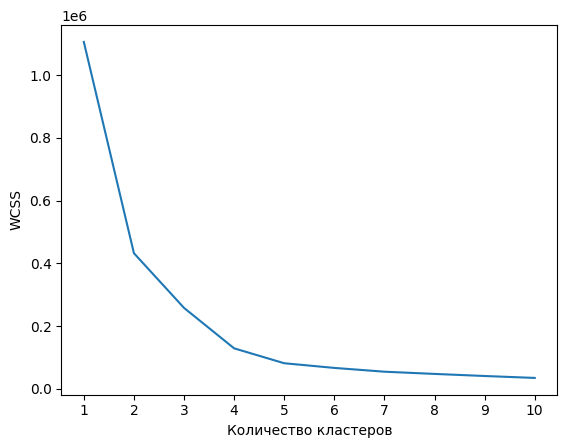

In [16]:
from sklearn.cluster import KMeans

wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=1)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.xticks(range(1, 11))
plt.xlabel("Количество кластеров")
plt.ylabel("WCSS")
plt.show()

# кросс-валидация

In [38]:
train = df.copy()

In [39]:
train = train.drop(columns=['Name','Ticket', 'Cabin'])

In [40]:
mean_age = train["Age"].mean(), train["Age"].median()
mean_age
train["Age"] = train["Age"].fillna(int(mean_age[1]))

In [41]:
max_embarked = train["Embarked"].value_counts()
max_embarked
train["Embarked"] = train["Embarked"].fillna(max_embarked.index[0])

In [42]:
assert not train.isnull().values.any()

In [43]:
le = LabelEncoder()

train['Sex'] = le.fit_transform(train['Sex'])

train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
1,2,1,1,0,38.0,1,0,71.2833,0
3,4,1,1,0,35.0,1,0,53.1000,2
6,7,0,1,1,54.0,0,0,51.8625,2
10,11,1,3,0,4.0,1,1,16.7000,2
11,12,1,1,0,58.0,0,0,26.5500,2


In [44]:
train = pd.get_dummies(train, columns=["Embarked"])

train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_0,Embarked_1,Embarked_2,Embarked_3
1,2,1,1,0,38.0,1,0,71.2833,1,0,0,0
3,4,1,1,0,35.0,1,0,53.1000,0,0,1,0
6,7,0,1,1,54.0,0,0,51.8625,0,0,1,0
10,11,1,3,0,4.0,1,1,16.7000,0,0,1,0
11,12,1,1,0,58.0,0,0,26.5500,0,0,1,0


In [45]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

y = train['Survived']
X = train.drop(columns=['Survived'])

X.head()


,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_0,Embarked_1,Embarked_2,Embarked_3
1,2,1,0,38.0,1,0,71.2833,1,0,0,0
3,4,1,0,35.0,1,0,53.1000,0,0,1,0
6,7,1,1,54.0,0,0,51.8625,0,0,1,0
10,11,3,0,4.0,1,1,16.7000,0,0,1,0
11,12,1,0,58.0,0,0,26.5500,0,0,1,0


In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [47]:
for max_depth in [1, 5, 10]:
    for n_estimators in [5, 100]:
        model = RandomForestClassifier(max_depth=max_depth, n_estimators=n_estimators)
        cv_accuracy = cross_val_score(model, X_train, y_train, cv=3, scoring='accuracy')
        print('Максимальная глубина: ', max_depth)
        print('Количество деревьев: ', n_estimators)
        print(f'Средняя accuracy: {np.mean(cv_accuracy)}\n')

Максимальная глубина:  1
Количество деревьев:  5
Средняя accuracy: 0.7364341085271318

Максимальная глубина:  1
Количество деревьев:  100
Средняя accuracy: 0.7131782945736435

Максимальная глубина:  5
Количество деревьев:  5
Средняя accuracy: 0.7829457364341085

Максимальная глубина:  5
Количество деревьев:  100
Средняя accuracy: 0.7829457364341086

Максимальная глубина:  10
Количество деревьев:  5
Средняя accuracy: 0.7596899224806202

Максимальная глубина:  10
Количество деревьев:  100
Средняя accuracy: 0.7906976744186046



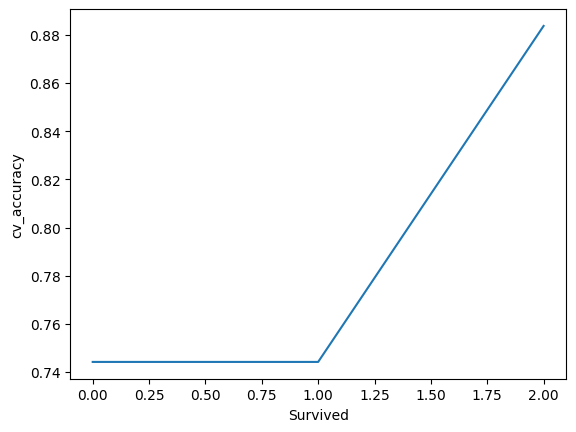

In [49]:
plt.plot(cv_accuracy)
plt.xlabel("Survived")
plt.ylabel("cv_accuracy")
plt.show()

# силуэтный коэффициент

In [50]:
from itertools import combinations

In [52]:
X_v2 = df.iloc[:, [5, 9, 1, 2]].values
X_v2

array([[ 38.    ,  71.2833,   1.    ,   1.    ],
       [ 35.    ,  53.1   ,   1.    ,   1.    ],
       [ 54.    ,  51.8625,   0.    ,   1.    ],
       [  4.    ,  16.7   ,   1.    ,   3.    ],
       [ 58.    ,  26.55  ,   1.    ,   1.    ],
       [ 34.    ,  13.    ,   1.    ,   2.    ],
       [ 28.    ,  35.5   ,   1.    ,   1.    ],
       [ 19.    , 263.    ,   0.    ,   1.    ],
       [ 49.    ,  76.7292,   1.    ,   1.    ],
       [ 65.    ,  61.9792,   0.    ,   1.    ],
       [ 38.    ,  80.    ,   1.    ,   1.    ],
       [ 45.    ,  83.475 ,   0.    ,   1.    ],
       [ 29.    ,  10.5   ,   1.    ,   2.    ],
       [ 25.    ,   7.65  ,   0.    ,   3.    ],
       [ 23.    , 263.    ,   1.    ,   1.    ],
       [ 46.    ,  61.175 ,   0.    ,   1.    ],
       [ 71.    ,  34.6542,   0.    ,   1.    ],
       [ 23.    ,  63.3583,   1.    ,   1.    ],
       [ 21.    ,  77.2875,   0.    ,   1.    ],
       [ 47.    ,  52.    ,   0.    ,   1.    ],
       [ 24.    , 24

In [65]:
x_new = pd.DataFrame(X_v2)

In [66]:
x_new.columns

RangeIndex(start=0, stop=4, step=1)

In [67]:
import pandas as pd
lst_vars=list(combinations(x_new.columns,2))

In [68]:
# количество пар
len(lst_vars)

6

In [69]:
lst_vars

[(0, 1), (0, 2), (0, 3), (1, 2), (1, 3), (2, 3)]

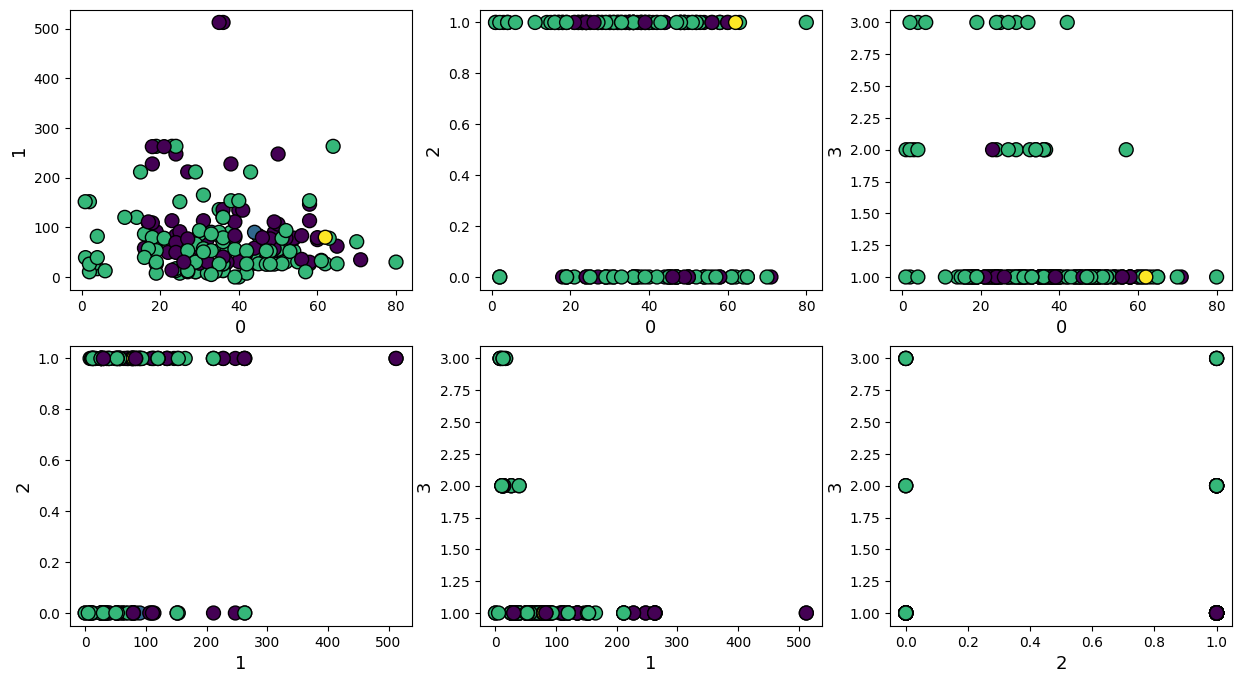

In [70]:
plt.figure(figsize=(15,8))
for i in range(1,7):
    plt.subplot(2,3,i)
    dim1=lst_vars[i-1][0]
    dim2=lst_vars[i-1][1]
    plt.scatter(x_new[dim1],x_new[dim2],c=df['Embarked'],edgecolor='k',s=100)
    plt.xlabel(f"{dim1}",fontsize=13)
    plt.ylabel(f"{dim2}",fontsize=13)

# визуализация матрицы схожести

In [105]:
df_copy = df.copy()

In [106]:
df_copy

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,2
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,2
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,2
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,2
...,...,...,...,...,...,...,...,...,...,...,...,...
871,872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,1,1,11751,52.5542,D35,2
872,873,0,1,"Carlsson, Mr. Frans Olof",male,33.0,0,0,695,5.0000,B51 B53 B55,2
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,0
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,2


In [107]:
df_copy = df_copy.drop(['PassengerId', 'Name', 'SibSp', 'Parch', 'Ticket', 'Cabin', 'Embarked'], axis=1)
df_copy

,Survived,Pclass,Sex,Age,Fare
1,1,1,female,38.0,71.2833
3,1,1,female,35.0,53.1000
6,0,1,male,54.0,51.8625
10,1,3,female,4.0,16.7000
11,1,1,female,58.0,26.5500
...,...,...,...,...,...
871,1,1,female,47.0,52.5542
872,0,1,male,33.0,5.0000
879,1,1,female,56.0,83.1583
887,1,1,female,19.0,30.0000


In [108]:
df_copy = df_copy.reindex(columns=['Age', 'Fare', 'Sex', 'Survived', 'Pclass'])
df_copy

,Age,Fare,Sex,Survived,Pclass
1,38.0,71.2833,female,1,1
3,35.0,53.1000,female,1,1
6,54.0,51.8625,male,0,1
10,4.0,16.7000,female,1,3
11,58.0,26.5500,female,1,1
...,...,...,...,...,...
871,47.0,52.5542,female,1,1
872,33.0,5.0000,male,0,1
879,56.0,83.1583,female,1,1
887,19.0,30.0000,female,1,1


In [109]:
df_copy = df_copy.dropna()
df_copy

,Age,Fare,Sex,Survived,Pclass
1,38.0,71.2833,female,1,1
3,35.0,53.1000,female,1,1
6,54.0,51.8625,male,0,1
10,4.0,16.7000,female,1,3
11,58.0,26.5500,female,1,1
...,...,...,...,...,...
871,47.0,52.5542,female,1,1
872,33.0,5.0000,male,0,1
879,56.0,83.1583,female,1,1
887,19.0,30.0000,female,1,1


In [110]:
df_copy['Survived'] = df_copy['Survived'].astype('category')
df_copy['Sex'] = df_copy['Sex'].astype('category')
df_copy['Pclass'] = df_copy['Pclass'].astype('category')

In [111]:
df_copy

,Age,Fare,Sex,Survived,Pclass
1,38.0,71.2833,female,1,1
3,35.0,53.1000,female,1,1
6,54.0,51.8625,male,0,1
10,4.0,16.7000,female,1,3
11,58.0,26.5500,female,1,1
...,...,...,...,...,...
871,47.0,52.5542,female,1,1
872,33.0,5.0000,male,0,1
879,56.0,83.1583,female,1,1
887,19.0,30.0000,female,1,1


In [112]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
vectorizer = TfidfVectorizer()
vectors = vectorizer.fit_transform(df_copy)

In [113]:
similarity_matrix = cosine_similarity(vectors)

In [114]:
print(similarity_matrix)

[[1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1.]]


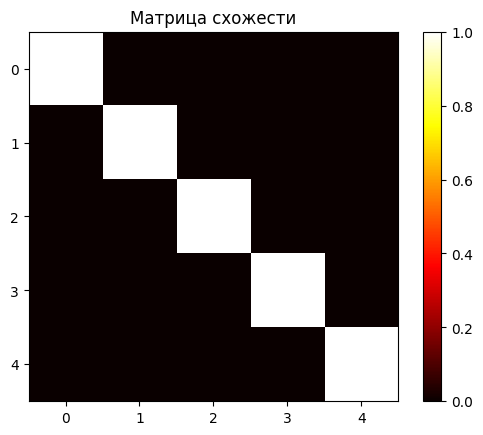

In [117]:
import numpy as np
import matplotlib.pyplot as plt

heatmap = plt.imshow(similarity_matrix, cmap='hot', interpolation='nearest')
plt.colorbar(heatmap)
plt.title('Матрица схожести')
plt.show()